# 2 Layers neural network vs basic linear regression

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import os
import time
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras

First we will define the dataset generate from equation $$ y = - \cos{(0.8 * x)}$$

In [ ]:
# Defining our dataset

x_train = np.linspace(0, 3, 50)
y_train = - np.cos(0.8*x_train)

# Plotting the dataset

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train, color= "cornflowerblue")
plt.show()

Let's first use a simple perceptron to perform a linear regression.
Mathematically, the model computes:

$$\hat{y} = w \cdot x + b$$

In [ ]:
def perceptron(input_shape= [1], units= 1, activation= None):
    model = keras.Sequential(
        [
            keras.layers.Input(shape= input_shape),
            keras.layers.Dense(units= units, activation= activation)
        ]
    )
    return model

linear_model = perceptron()


linear_model.summary()

Now Let's train the model and plot the training loss

In [ ]:
linear_model.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.SGD(learning_rate= 0.02)
)
history = linear_model.fit(x_train, y_train, epochs= 35, batch_size= 50)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history.history['loss'])
plt.show()

Use the trained model for prediction! (spoiler: result should not be satisfactory, do you know why?)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


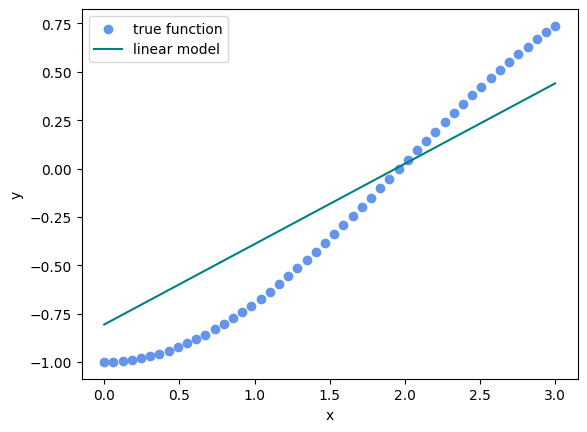

In [8]:
y_pred_linear = linear_model.predict(x_train)

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train, color='cornflowerblue', label= 'true function')
plt.plot(x_train, y_pred_linear, color= 'teal', label= 'linear model')
plt.legend()
plt.show()

Let's train another model using 2 layer nn

In [9]:
def neural_net_2layers(input_shape= [1], units= 16, activation= 'sigmoid'):
    model = keras.Sequential(
        [
            keras.layers.Input(shape= input_shape),
            keras.layers.Dense(units= units, activation= activation),
            keras.layers.Dense(units= 1)
        ]
    )
    return model

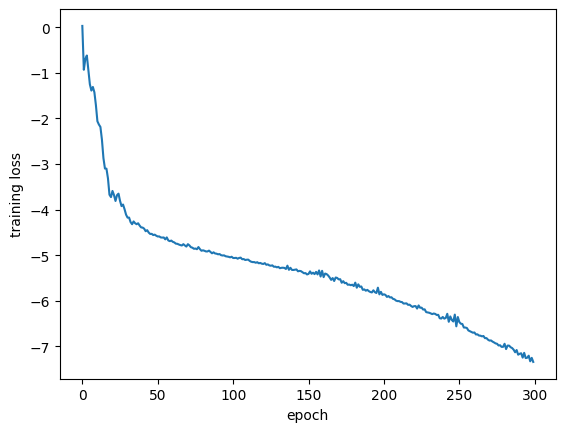

In [10]:
net = neural_net_2layers(units= 10)

net.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate= 0.05)  # feel free to experiment different optpimizer!
)

history = net.fit(x_train, y_train, epochs= 300, batch_size= 25, verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(np.log(history.history['loss']))
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


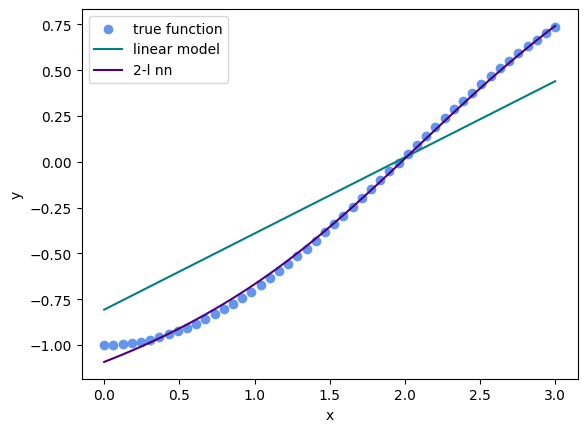

In [12]:
y_pred_2l = net.predict(x_train)

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train, color='cornflowerblue', label = 'true function')
plt.plot(x_train, y_pred_linear, color= 'teal', label = 'linear model')
plt.plot(x_train, y_pred_2l, color= 'indigo', label = '2-l nn')
plt.legend()
plt.show()